# DS-001 - INTRODUÇÃO À ANÁLISE DE DADOS COM PYTHON
### Prof. Felipe Lobo
*Esta disciplina tem 08h de atividades presenciais em sala de aula e 08h on-line no Moodle.*

---
**Aula 3**
**Pergunta orientadora:** Como selecionar e importar bases de dados promissoras para análise no ambiente do Jupyter Notebook?

**Entregável:** Base de dados para o projeto do Módulo.

**Experiência:** obter base de dados sobre Covid-19 no Github do Centro de Pesquisa Johns Hopkins e visualizá-la.

---

**Base de Dados que utilizaremos:**
[Link-Dados-Covid-Global](https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports)

### **Roteiro da aula**
## 1- extrair algumas informações da base de dados
Se tirarmos uma snapshot da base de apenas um dia, podemos ter uma informação limitada
Ex: casos corifmados na china é muito maior que nos outros países, já o número de novos casos a situação é inversa.

Acessar o endereço
https://boavista.rr.gov.br/prefeitura/secretarias-e-orgaos-municipais/secretaria-municipal-de-saude/boletim-epidemiologico

https://boavista.rr.gov.br/painel-interativo-sobre-covid-19

## 2- combinar dados de lugares diferentes
-- usar métodos concat, set_index, sort_values e dropna

## 3- calcular taxa incidência e mortalidade
incidencia = numero de casos confirmados / população total * 100000
mortalidade =  numero de mortes / população total *100000
resultado é a cada 100 pessoas

In [1]:


# 1) Importe a biblioteca PANDAS. Ela possui códigos prontos, para que possamos abrir com o Python a base de dados.
import pandas as pd

# 2) Obtenha as bases de dados.
### O caminho abaixo corresponde à localização do arquivo. O seu caminho pode ser diferente.
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# 3) Verifique o conteúdo da base de dados, para estar seguro de que os dados foram obtidos adequadamente.
### Podemos ter uma noção do conteúdo do banco, pedindo para o Python nos mostrar os seus 5 primeiros registros.
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [2]:
mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [3]:
recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 4) Podemos ter uma ideia dos últimos 5 itens do nosso banco, pedindo isso ao Python com o seguinte comando.
confirmados.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [5]:
confirmados.shape, mortes.shape, recuperados.shape

((289, 1147), (289, 1147), (274, 1147))

### Exercício 1.

- Calcule e imprima o número total de casos confirmados, mortes e recuperados em cada um dos dataframes.

In [6]:
#### pegando a ultima data
Ultima_Data = "3/9/23"
confirmados[Ultima_Data]

0      209451
1      334457
2      271496
3       47890
4      105288
        ...  
284    703228
285       535
286     11945
287    343135
288    264276
Name: 3/9/23, Length: 289, dtype: int64

In [7]:
confirmados_por_pais = confirmados.set_index("Country/Region")[confirmados.columns[4:]].max(axis=1).to_frame().groupby("Country/Region").sum()
confirmados_por_pais.columns = ["confirmados_por_pais"]
confirmados_por_pais

,confirmados_por_pais
Country/Region,
Afghanistan,209451
Albania,334457
Algeria,271496
Andorra,47890
Angola,105288
...,...
West Bank and Gaza,703228
Winter Olympics 2022,535
Yemen,11945


In [8]:
mortes_por_pais = mortes.set_index("Country/Region")[mortes.columns[4:]].max(axis=1).to_frame().groupby("Country/Region").sum()
mortes_por_pais.columns = ["mortes_por_pais"]
mortes_por_pais

,mortes_por_pais
Country/Region,
Afghanistan,7896
Albania,3598
Algeria,6881
Andorra,165
Angola,1933
...,...
West Bank and Gaza,5708
Winter Olympics 2022,0
Yemen,2159


In [9]:
recuperados_por_pais = recuperados.set_index("Country/Region")[recuperados.columns[4:]].max(axis=1).to_frame().groupby("Country/Region").sum()
recuperados_por_pais.columns = ["recuperados_por_pais"]
recuperados_por_pais

,recuperados_por_pais
Country/Region,
Afghanistan,82586
Albania,130314
Algeria,118409
Andorra,14380
Angola,39582
...,...
West Bank and Gaza,312320
Winter Olympics 2022,0
Yemen,4251


## Como unir as bases de dados?
- Função concat para concatenar as bases, conforme exemplo abaixo:

In [10]:
# criando uma tabela unindo as bases
nova_DB = [confirmados_por_pais, mortes_por_pais, recuperados_por_pais]
base_combinada = pd.concat(nova_DB, axis=1)
base_combinada.loc['China']

confirmados_por_pais    4903557
mortes_por_pais          101056
recuperados_por_pais     100035
Name: China, dtype: int64

Mudando o nome das colunas

In [11]:
base_combinada.columns = ["confirmadas", "mortes", "recuperados"]
base_combinada.head()

,confirmadas,mortes,recuperados
Country/Region,,,
Afghanistan,209451,7896,82586
Albania,334457,3598,130314
Algeria,271496,6881,118409
Andorra,47890,165,14380
Angola,105288,1933,39582


### Exercício 2
- Qual o país com maior número de casos confirmados
- Qual o país com maior número de mortes

In [12]:
base_combinada.idxmax()

confirmadas       US
mortes            US
recuperados    India
dtype: object

### Biblioteca Matplotlib

- Uma das principais bibliotecas de visualização de dados em Python.
- Permite a criação de gráficos e visualização de alta qualidade de forma simples e eficiente.
- Tipos de gráficos: linhas, barra, histogramas e disperção.

<Axes: xlabel='Country/Region'>

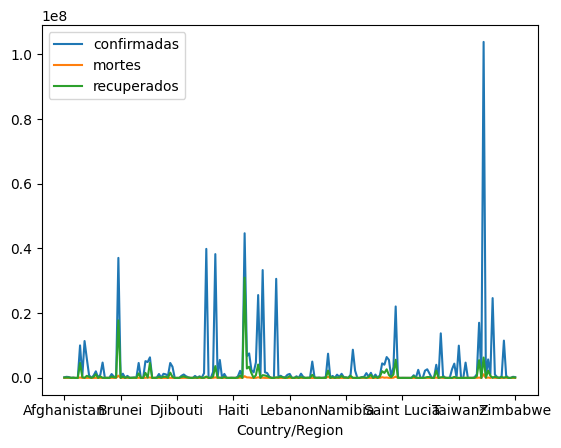

In [13]:
### Importar a biblioteca
import matplotlib.pyplot as plt

### Exemplo de gráfico  de linha
base_combinada.plot()

<Axes: xlabel='Country/Region'>

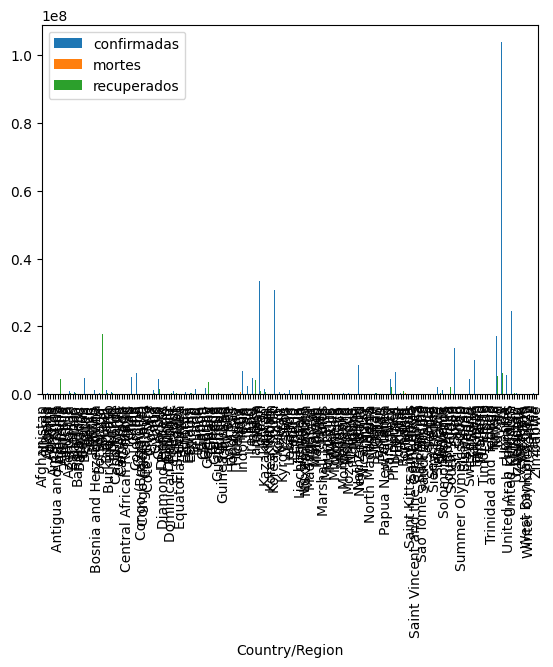

In [14]:
### Exemplo de gráfico  de barras
base_combinada.plot(kind = "bar")

<Axes: ylabel='Frequency'>

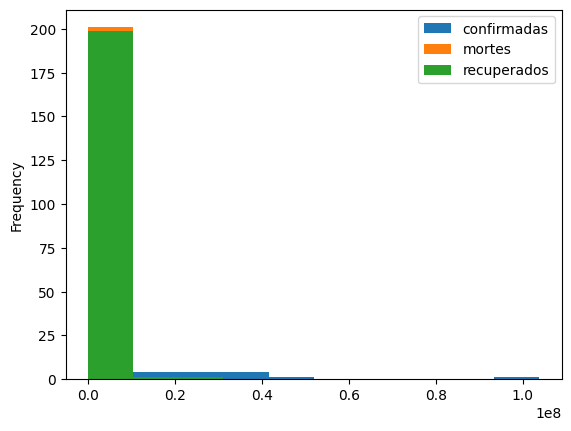

In [15]:
### Exemplo de gráfico histograma
base_combinada.plot(kind = "hist")

### Existe maneiras de melhorias nos gráficos
- Ajustar o tamanho da Figura (figsize)
- título (title)
- nomear os eixos (xlabel, ylabel)

<Axes: title={'center': 'Cenário Covid'}, xlabel='Eixo x', ylabel='Eixo y'>

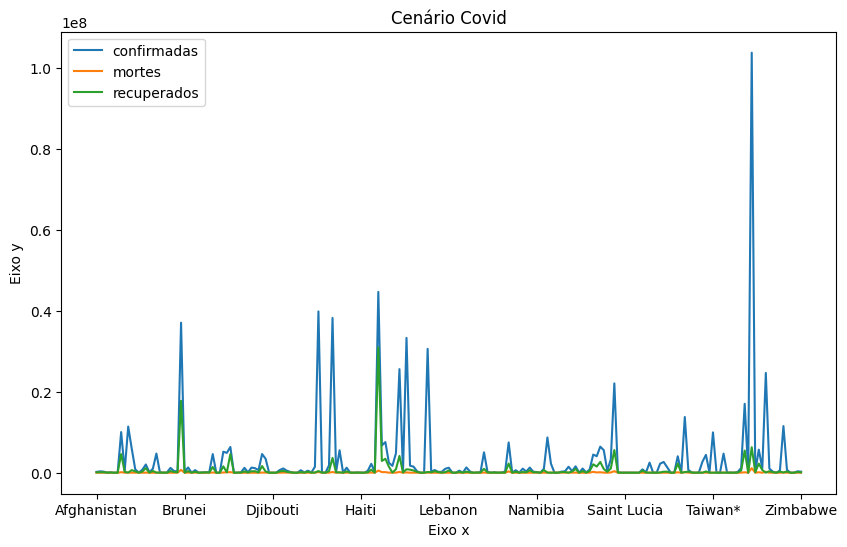

In [16]:
base_combinada.plot(figsize=(10,6), title = "Cenário Covid", xlabel="Eixo x", ylabel="Eixo y")

### Exercício 3

- Plote um gráfico de linha mostrando a tendência de casos confirmados ao longo do tempo para um país específico.

- Crie um gráfico de barras mostrando os cinco países com o maior número de mortes.

### Como calcular a taxa de mortalidade?

- Pesquise na internet, em local de fonte confiável, como se dá o cálculo da taxa de mortalidade e letalidade.

### Exercício 4

- Calcule a taxa de mortalidade e encontre os países com as maiores e menores taxas.
- Calcule a taxa de letalidade e encontre os países com as maiores e menores taxas.

### Exercício 5

- Utilize a biblioteca Matplotlib para plotar gráficos que ajudem a visualizar as taxas calculadas no exercício anterior.